# Interactuar con la API de Open Street MAP: búsqueda de rutas

Aquí sólo pongo una de las múltiples posibilidades para interactar con la API de Open streetMap, el cálculo de rutas entre dos puntos. Para un areferencia completa véase: Bonny P. McClain (2022). Python for Geospatial Data Analysis: Theory, Tools and Practice for Location Intelligence. Ed O’Reilly




In [25]:
# conda install osmx
# conda install shapely
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt

import shapely
import osmnx as ox # Esta es la librería que facilita la descarga de datos de OpenStreetMap
import networkx as nx # Esta es la librería que facilita el análisis de redes
ox.settings.log_console = True
ox.settings.use_cache = True

Primero determino el Punto de Salida y el punto de destino:

Quiero ir desde la Facultad de Estudios Estadísticos hasta La Facultad de Documentación en el Barrio de Chamberi, y como no conozco la posición primero geolocalizo por la dirección

In [26]:
objetivo=["Facultad de Estudios Estadísticos, Madrid",
          "Calle Santísima Trinidad, 37,Madrid"]
geo_output=gpd.tools.geocode(objetivo)  # la salida es un geodataframe de geopandas. 

geo_output


salida=(geo_output.loc[0,"geometry"].y, geo_output.loc[0,"geometry"].x) # Facultad de Estudios Estadísticos (hay que darle la vuelta a long y lat)
llegada=(geo_output.loc[1,"geometry"].y , geo_output.loc[1,"geometry"].x) # Facultad de Comercio

print(salida)
print(llegada)

(40.4467173, -3.7371169441383207)
(40.4380604, -3.7014449881455596)


Ahora me descargo el gráfico de una ciudad (place="Madrid, Spain"), o si se que no voy a ir muy lejos el gráfo de un entorno al punto de salida

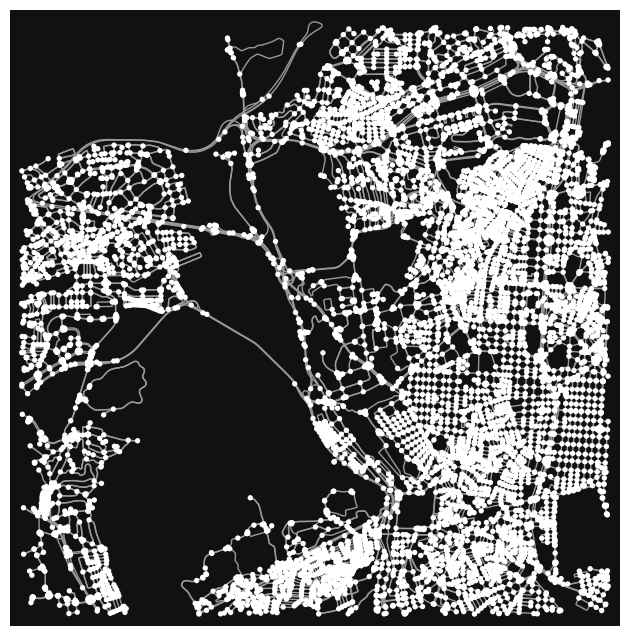

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [27]:
place='Madrid, Spain'
#G = ox.graph_from_place(place, network_type='drive')


G = ox.graph_from_point(salida, dist=5000, network_type='drive')

ox.plot_graph(G)



Ahora busca entre los nodos del grafo que hemos descargado, cuales son los más cercanos a nuestro punto de Salida y a nuestro punto de llegada

In [28]:
# Encontrar los nodos más cercanos
origin_node = ox.distance.nearest_nodes(G, salida[1], salida[0])
destination_node = ox.distance.nearest_nodes(G, llegada[1], llegada[0])


Ahora busco la ruta más corta utilizando la librería networkx

In [29]:
# Calcular la ruta más corta # weight='length'
route = nx.shortest_path(G, origin_node, destination_node, weight='length')

# o calcular la ruta más rápida # weight='time'
# route = nx.shortest_path(G, origin_node, destination_node, weight='length')


# Número de nodos en la ruta
num_nodes = len(route)

# Longitud total de la ruta
route_length = nx.shortest_path_length(G, origin_node, destination_node, weight='length')

# Resumen de la ruta
route_summary = {
    "Número de nodos": num_nodes,
    "Longitud total (metros)": route_length
}
# Resumen de la ruta
route_summary


{'Número de nodos': 18,
 'Longitud total (metros)': np.float64(3520.4831313826608)}

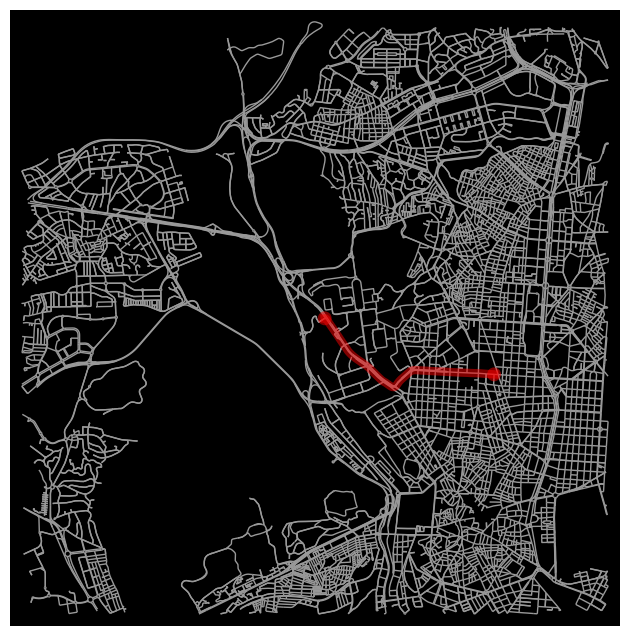

In [30]:
# Mostrar la ruta
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k', orig_dest_size=100)

Finalmente puedo representar la ruta utilizando leafleft

In [31]:
print(ox.__version__)

shortest_route_map = ox.plot_route_folium(G, route)
shortest_route_map


2.0.1


AttributeError: module 'osmnx' has no attribute 'plot_route_folium'

Puedo añadir más información al mapa

In [ ]:
import folium

# Añadir un punto negro en la salida
folium.Marker(
    location=[salida[0], salida[1]],
    popup='Salida',
    icon=folium.Icon(color='black')
).add_to(shortest_route_map)

# Añadir un punto rojo en la llegada
folium.Marker(
    location=[llegada[0], llegada[1]],
    popup='Llegada',
    icon=folium.Icon(color='red')
).add_to(shortest_route_map)

shortest_route_map